In [1]:
from mapbox import Geocoder
geocoder = Geocoder()
import os
geocoder.session.params['access_token'] == os.environ['MAPBOX_ACCESS_TOKEN']

True

In [4]:
from mapbox import Datasets
datasets = Datasets()
listing_resp = datasets.list()
print(listing_resp)
#[ds['id'] for ds in listing_resp.json()]

<Response [404]>


In [13]:
zoom_level = 15

In [14]:
from mapbox import StaticStyle

service = StaticStyle()
response = service.image(
    username='mapbox',
    style_id='streets-v9',
    lon=-95.3698, lat=29.7604, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static.png', 'wb') as output:
    _ = output.write(response.content)

In [15]:
#satellite
response = service.image(
    username='mapbox',
    style_id='satellite-v9',
    lon=-95.3698, lat=29.7604, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_sat.png', 'wb') as output:
    _ = output.write(response.content)

In [16]:
# satellite-streets-v10
response = service.image(
    username='mapbox',
    style_id='satellite-streets-v10',
    lon=-95.3698, lat=29.7604, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_sat_st.png', 'wb') as output:
    _ = output.write(response.content)

In [17]:
# light
response = service.image(
    username='mapbox',
    style_id='light-v9',
    lon=-95.3698, lat=29.7604, zoom=zoom_level)

response.status_code

response.headers['Content-Type']

with open('./tmp/static_light.png', 'wb') as output:
    _ = output.write(response.content)

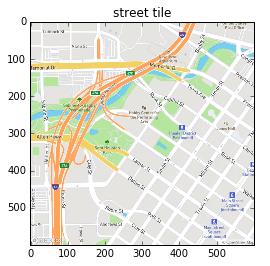

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

street_tile_img = cv2.imread('./tmp/static.png', cv2.IMREAD_UNCHANGED)
#cv2.imshow('street',street_tile_img)

new_style = {'grid': False}
# visualize
plt.imshow(cv2.cvtColor(street_tile_img, cv2.COLOR_BGR2RGB))
plt.title('street tile')


In [52]:
np.unique(street_tile_img[:,:,2])

array([ 14,  40,  41,  52,  56,  59,  63,  66,  68,  72,  73,  74,  78,
        79,  82,  87,  89,  90,  95,  98, 103, 105, 106, 110, 111, 113,
       116, 117, 119, 120, 121, 122, 123, 126, 138, 139, 140, 142, 143,
       144, 148, 150, 151, 154, 156, 159, 163, 167, 168, 174, 175, 177,
       179, 182, 184, 185, 187, 198, 199, 200, 201, 204, 206, 208, 209,
       210, 211, 212, 214, 215, 217, 220, 224, 227, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 240, 242, 244, 245, 246, 247, 248, 249,
       251, 255], dtype=uint8)

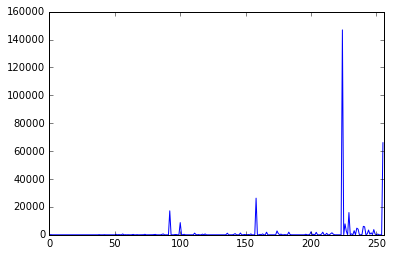

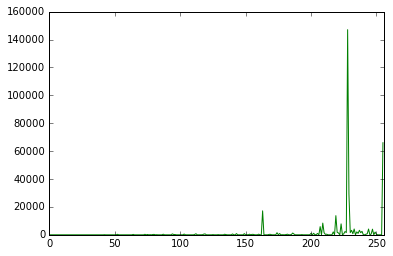

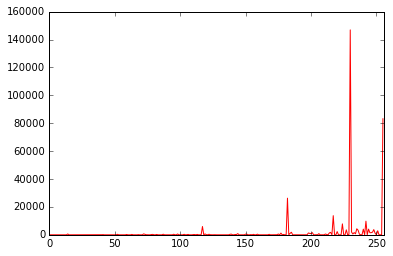

In [25]:
from matplotlib import pyplot as plt

img = cv2.imread('./tmp/static.png', cv2.IMREAD_UNCHANGED)
color = ('b','g','r')
for i,col in enumerate(color):
     histr = cv2.calcHist([img],[i],None,[256],[0,256])
     plt.plot(histr,color = col)
     plt.xlim([0,256])
     plt.show()


In [24]:
img.shape

(600, 600, 3)

In [61]:
# get a binary mask [0, 1] filtered by target color
def get_mask(img, target):
    tolerenace = 10
    mask = cv2.inRange(img, target-tolerenace, target+tolerenace)
    return (mask != 0)

[False  True]
[False  True]
[False  True]
[False  True]


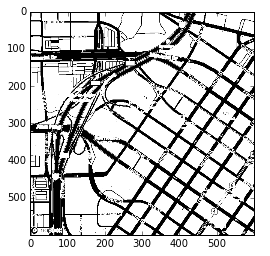

In [77]:
# BGR
# Orange
target1 = np.array([99, 160, 255])
# Yellow
target2 = np.array([100, 209, 242])
# White
target3 = np.array([255, 255, 255])

mask1 = get_mask(img, target1)
mask2 = get_mask(img, target2)
mask3 = get_mask(img, target3)

print(np.unique(mask1))
print(np.unique(mask2))
print(np.unique(mask3))

super_mask = np.logical_or(np.logical_or(mask1, mask2), mask3)
print(np.unique(super_mask))

plt.imshow(super_mask, cmap=plt.cm.binary)
new_style = {'grid': False}

In [ ]:
# TODO erode and dilate